In [1]:
# Parameters - This cell is tagged for papermill parameter injection
country = "demo"
training_start_date = "demo"
training_end_date = "demo"
base_model_path = "demo"

In [2]:
print(f"Country: {country}")
print(f"Training period: {training_start_date} to {training_end_date}")
print(f"Base model path: {base_model_path}")

Country: demo
Training period: demo to demo
Base model path: demo


In [3]:
import yaml
import os

# Load the base model configuration
print(f"Loading base model configuration from: {base_model_path}")

# Check if file exists
if not os.path.exists(base_model_path):
    print(f"Warning: Base model file not found at {base_model_path}")
    print("Creating a dummy configuration...")
    with open("../../model builders/base_model.yml", 'r') as file:
        base_model_config = yaml.safe_load(file)
else:
    with open(base_model_path, 'r') as file:
        base_model_config = yaml.safe_load(file)
    print("✅ Base model configuration loaded successfully")

print(f"Base model config: {base_model_config}")

Loading base model configuration from: demo
Creating a dummy configuration...
Base model config: {'model': {'class': 'pymc_marketing.mmm.multidimensional.MMM', 'kwargs': {'date_column': 'date', 'channel_columns': ['paidm_soc_fb_excl_cbpr2_imp', 'paidm_dsp_google_imp', 'paidm_search_generic_google_imp', 'paidm_search_brand_google_imp', 'paidm_dsp_ttd_imp', 'paidm_search_generic_apple_imp', 'paidm_search_brand_apple_imp', 'paidm_search_generic_bing_imp', 'paidm_search_brand_bing_imp', 'paidm_soc_tw_imp', 'paidm_soc_reddit_imp', 'paidm_soc_tiktok_imp', 'paidm_audio_weighted_imp', 'paidm_audio_podscribe_imp', 'paidm_tv_imp'], 'target_column': 'kpi_registrations', 'dims': ['market'], 'scaling': {'target': {'method': 'max', 'dims': []}, 'channel': {'method': 'max', 'dims': []}}, 'adstock': {'class': 'pymc_marketing.mmm.GeometricAdstock', 'kwargs': {'l_max': 24, 'priors': {'alpha': {'distribution': 'Beta', 'alpha': 1.0, 'beta': 3.0, 'dims': ['market', 'channel']}}}}, 'saturation': {'class': '

In [4]:
import warnings

In [5]:
## Add ../.. to the path to import from the parent directory
import sys
sys.path.append("../..")

In [6]:
from wise.preprocessing import clean_data

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

import pytensor
import pytensor.tensor as pt

import pymc as pm

from pymc_marketing.plot import plot_curve
from pymc_marketing.prior import Prior
from pymc_marketing.mmm.builders.yaml import build_mmm_from_yaml

/opt/anaconda3/envs/wise_env/lib/python3.12/site-packages/pymc_marketing/mmm/multidimensional.py:68: FutureWarning: This functionality is experimental and subject to change. If you encounter any issues or have suggestions, please raise them at: https://github.com/pymc-labs/pymc-marketing/issues/new
  warnings.warn(warning_msg, FutureWarning, stacklevel=1)
/var/folders/c4/zk_dn24x6bb_j3wg63h3d2m80000gp/T/ipykernel_83347/4114199942.py:14: UserWarning: The pymc_marketing.mmm.builders module is experimental and its API may change without warning.
  from pymc_marketing.mmm.builders.yaml import build_mmm_from_yaml


In [8]:
plt.style.use('seaborn-v0_8')
plt.rcParams['font.size'] = 14

plt.rcParams['axes.labelsize'] = 6
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['axes.titleweight'] = 'bold'


plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.dpi"] = 100

In [9]:
%reload_ext autoreload
%autoreload 2

In [10]:
warnings.filterwarnings('ignore')

In [11]:
pytensor.config.floatX = "float32"

In [12]:
data = pd.read_csv("../../data/csv/full_dataset.csv")
data.head()

,DATE,MARKET,TEST_FLAG,UNIQUE_KEY,KPI_REGISTRATIONS,KPI_XCCY_NU,SEASONALITY,TREND,SEO_CONTENT_DISTINCT_VISITORS,SEO_PRODUCTS_DISTINCT_VISITORS,...,PAIDM_AUDIO_PODSCRIBE_REACH,PAIDM_TV_SPD_GBP,PAIDM_TV_IMP,WISE_PLATFORM_DISTINCT_VISITORS,ORGANIC_SOCIAL_DISTINCT_VISITORS,ORGANIC_SOCIAL_DISTINCT_VISITORS_ADJ,OWNED_PARTNERS_DISTINCT_VISITORS,_AIRFLOW_RUN_ID,_SDC_BATCHED_AT,_SDC_LOADED_AT
0,2024-04-10,BRA,1,e5eee5d12d8bef6d8b464478ada5a8ec,0,0,0.0,0.0,0,0,...,0,0.0,0,0,0,0,0,scheduled__2025-04-05T11:00:00+00:00,2025-04-05 11:00:00.000,2025-04-06 12:08:48.627 Z
1,2023-05-30,USA,1,ee85c4dfa79afc2d3360d48f42cad40d,0,0,0.0,0.0,0,0,...,0,0.0,0,0,0,0,0,scheduled__2025-04-05T11:00:00+00:00,2025-04-05 11:00:00.000,2025-04-06 12:08:48.627 Z
2,2025-01-05,USA,1,cc269f69399b5c11e61453763593b607,0,0,0.0,0.0,0,0,...,2,0.0,0,0,0,0,0,scheduled__2025-04-05T11:00:00+00:00,2025-04-05 11:00:00.000,2025-04-06 12:08:48.627 Z
3,2023-06-05,BRA,1,359b198e59bce68dea912c264c230088,0,0,0.0,0.0,0,0,...,0,0.0,0,0,0,0,0,scheduled__2025-04-05T11:00:00+00:00,2025-04-05 11:00:00.000,2025-04-06 12:08:48.627 Z
4,2024-02-16,DEU,1,5f997ea491bbe58e32d750c479b5c018,0,0,0.0,0.0,0,0,...,0,0.0,0,0,0,0,0,scheduled__2025-04-05T11:00:00+00:00,2025-04-05 11:00:00.000,2025-04-06 12:08:48.627 Z


In [13]:
model_data = clean_data(
    dataset=data,
    countries_list=["GBR"],
    target_column=base_model_config["model"]["kwargs"]["target_column"],
    date_column=base_model_config["model"]["kwargs"]["date_column"],
    dims=tuple(base_model_config["model"]["kwargs"]["dims"]),
)

In [14]:
model_data[base_model_config["model"]["kwargs"]["date_column"]].min(), model_data[base_model_config["model"]["kwargs"]["date_column"]].max()

('2022-01-01', '2025-04-05')

In [15]:
X = model_data.drop(columns=[base_model_config["model"]["kwargs"]["target_column"]]).fillna(0)
y = model_data[[base_model_config["model"]["kwargs"]["target_column"]]].fillna(0)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1191, 17)
y shape: (1191, 1)


In [ ]:
X_train = X[
    (model_data[base_model_config["model"]["kwargs"]["date_column"]] >= training_start_date)
    & (model_data[base_model_config["model"]["kwargs"]["date_column"]] <= training_end_date)
]

y_train = y.loc[X_train.index]

In [16]:
# Convert data types to 32-bit to maintain consistency
for col in X_train.columns:
    if X_train[col].dtype in ['int64', 'int32']:
        X_train[col] = X_train[col].astype('int32')
    elif X_train[col].dtype in ['float64', 'float32']:
        X_train[col] = X_train[col].astype('float32')

# Keep target variable as int32
y_train[base_model_config["model"]["kwargs"]["target_column"]] = y_train[base_model_config["model"]["kwargs"]["target_column"]].astype('int32')

print(f"Training set - X shape: {X_train.shape}, y shape: {y_train.shape}")
print(f"Training date range: {X_train['date'].min()} to {X_train['date'].max()}")

Training set - X shape: (952, 17), y shape: (952, 1)
Test set - X shape: (239, 17), y shape: (239, 1)
Training date range: 2022-01-01 to 2024-08-09
Test date range: 2024-08-10 to 2025-04-05


In [ ]:
mmm = build_mmm_from_yaml(
    config_path=base_model_path,
    X=X_train,
    y=y_train.squeeze(),
)

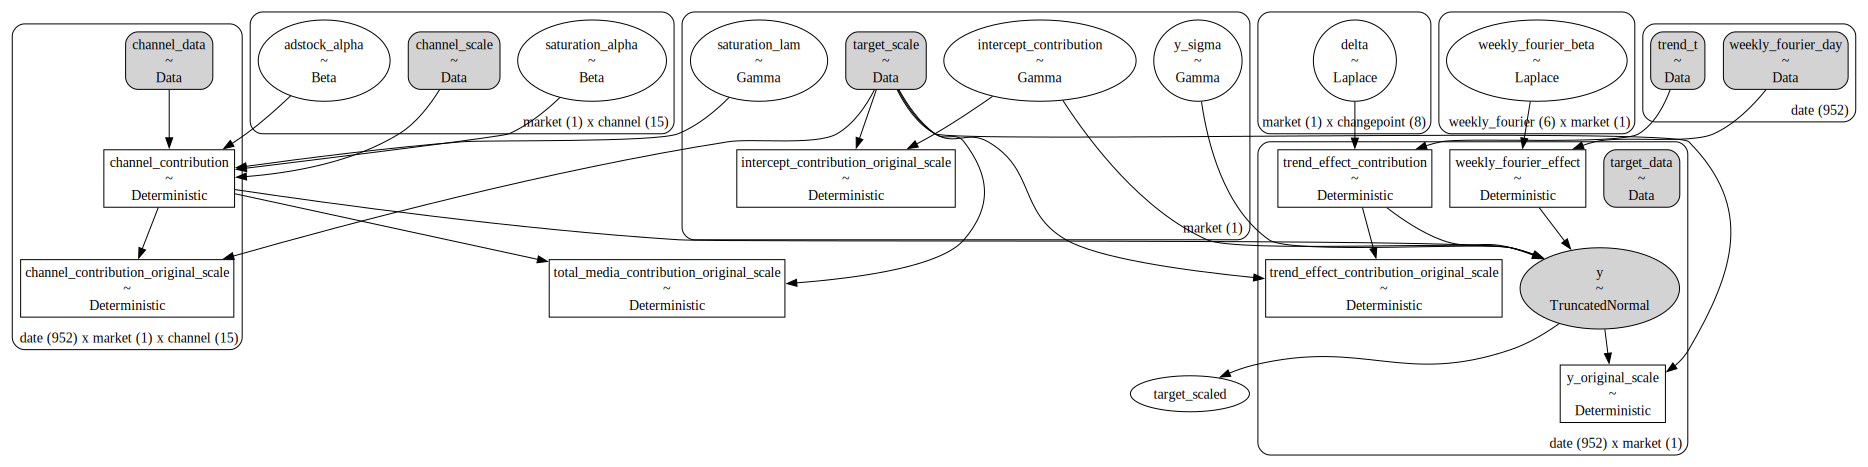

In [20]:
mmm.model.to_graphviz()

In [21]:
mmm.sample_prior_predictive(X_train)

Sampling: [adstock_alpha, delta, intercept_contribution, saturation_alpha, saturation_lam, weekly_fourier_beta, y, y_sigma]


<xarray.Dataset> Size: 391kB
Dimensions:  (date: 952, market: 1, sample: 100)
Coordinates:
  * date     (date) datetime64[ns] 8kB 2022-01-01 2022-01-02 ... 2024-08-09
  * market   (market) <U3 12B 'GBR'
  * sample   (sample) object 800B MultiIndex
  * chain    (sample) int64 800B 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
  * draw     (sample) int64 800B 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99
Data variables:
    y        (date, market, sample) float32 381kB 1.481 0.02699 ... 1.311 0.5657
Attributes:
    created_at:                 2025-06-18T09:15:33.348944+00:00
    arviz_version:              0.21.0
    inference_library:          pymc
    inference_library_version:  5.23.0
    pymc_marketing_version:     0.14.0

In [ ]:
mmm.fit(
    X=X_train,
    y=y_train.squeeze(),
    progressbar=False,
)

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [intercept_contribution, adstock_alpha, saturation_alpha, saturation_lam, delta, weekly_fourier_beta, y_sigma]


Output()

Sampling 1 chain for 500 tune and 100 draw iterations (500 + 100 draws total) took 369 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data
	> fit_data

In [23]:
mmm.sample_posterior_predictive(X_train)

Sampling: [y]


Output()

<xarray.Dataset> Size: 772kB
Dimensions:           (date: 952, market: 1, sample: 100)
Coordinates:
  * date              (date) datetime64[ns] 8kB 2022-01-01 ... 2024-08-09
  * market            (market) <U3 12B 'GBR'
  * sample            (sample) object 800B MultiIndex
  * chain             (sample) int64 800B 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
  * draw              (sample) int64 800B 0 1 2 3 4 5 6 ... 93 94 95 96 97 98 99
Data variables:
    y                 (date, market, sample) float32 381kB 0.3367 ... 0.7394
    y_original_scale  (date, market, sample) float32 381kB 1.619e+03 ... 3.55...
Attributes:
    created_at:                 2025-06-18T09:21:47.859040+00:00
    arviz_version:              0.21.0
    inference_library:          pymc
    inference_library_version:  5.23.0

In [24]:
mmm.idata.sample_stats.diverging.sum().item()

0

In [25]:
model_vars = [
    "adstock_alpha",
    "delta",
    "weekly_fourier_beta",
    "intercept_contribution",
    "saturation_alpha",
    "saturation_lam",
    "y_sigma",
]

In [26]:
az.summary(
    mmm.idata,
    var_names=model_vars,
)

arviz - WARNING - Shape validation failed: input_shape: (1, 100), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"adstock_alpha[GBR, paidm_audio_podscribe_imp]",0.238,0.194,0.006,0.657,0.018,0.016,94.0,91.0,NaN
"adstock_alpha[GBR, paidm_audio_weighted_imp]",0.515,0.294,0.022,0.886,0.026,0.025,122.0,79.0,NaN
"adstock_alpha[GBR, paidm_dsp_google_imp]",0.839,0.117,0.570,0.963,0.019,0.021,51.0,52.0,NaN
"adstock_alpha[GBR, paidm_dsp_ttd_imp]",0.980,0.008,0.964,0.993,0.001,0.001,45.0,37.0,NaN
"adstock_alpha[GBR, paidm_search_brand_apple_imp]",0.255,0.201,0.004,0.699,0.014,0.015,177.0,77.0,NaN
"adstock_alpha[GBR, paidm_search_brand_bing_imp]",0.231,0.172,0.018,0.583,0.015,0.015,116.0,92.0,NaN
"adstock_alpha[GBR, paidm_search_brand_google_imp]",0.216,0.169,0.005,0.541,0.012,0.012,139.0,67.0,NaN
"adstock_alpha[GBR, paidm_search_generic_apple_imp]",0.264,0.201,0.006,0.656,0.014,0.031,200.0,48.0,NaN
"adstock_alpha[GBR, paidm_search_generic_bing_imp]",0.484,0.191,0.147,0.812,0.016,0.018,148.0,59.0,NaN
"adstock_alpha[GBR, paidm_search_generic_google_imp]",0.099,0.080,0.005,0.265,0.006,0.007,152.0,112.0,NaN


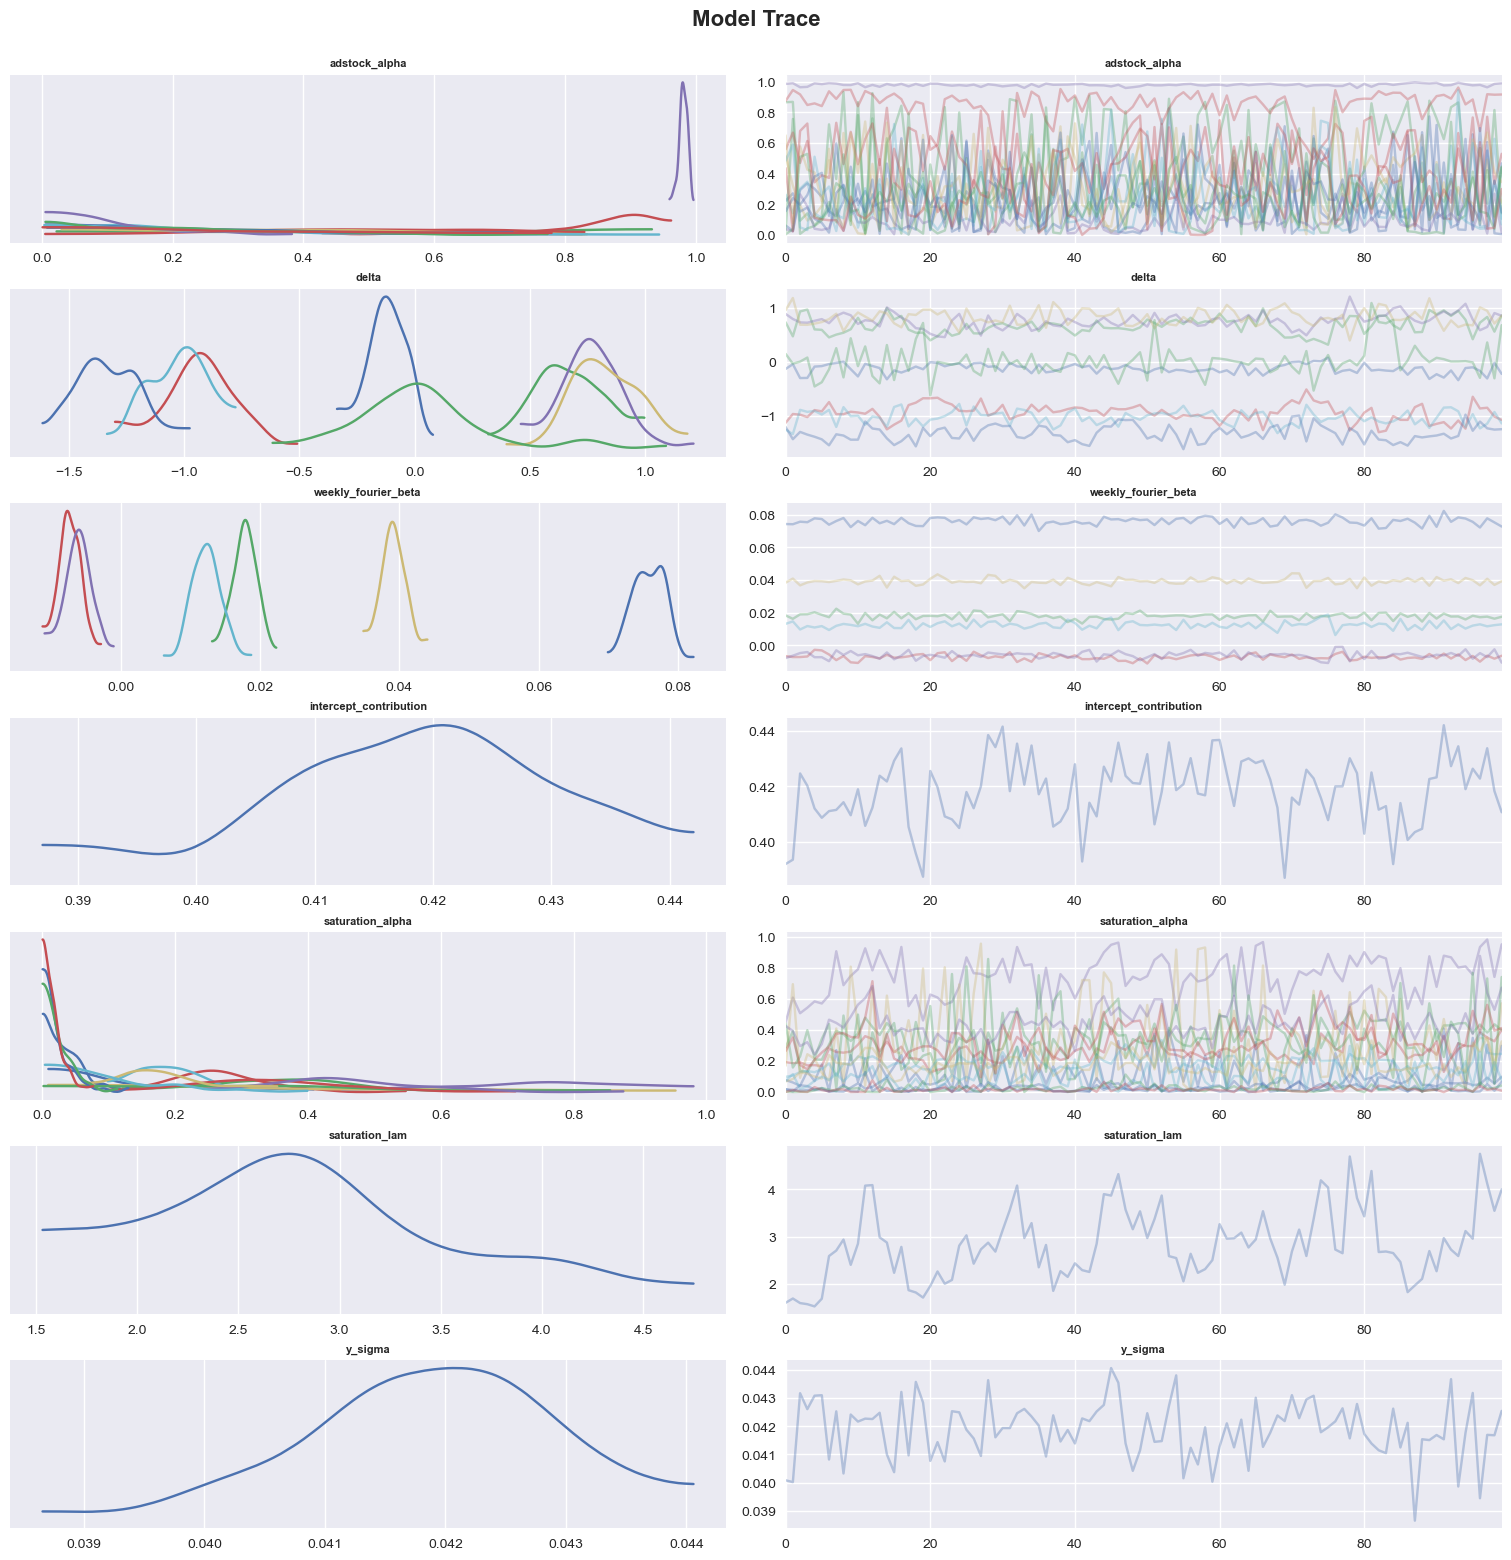

In [27]:
_ = az.plot_trace(
    data=mmm.fit_result,
    var_names=model_vars,
    compact=True,
    backend_kwargs={"figsize": (15, 15), "layout": "constrained"},
)
plt.gcf().suptitle("Model Trace", fontsize=16, fontweight="bold", y=1.03);

In [ ]:
# Convert date column to datetime
model_data['date'] = pd.to_datetime(model_data['date'])

# Get the number of markets
n_markets = len(mmm.model.coords["market"])

fig, axes = plt.subplots(
    nrows=n_markets,
    figsize=(12, 9),
    sharex=True,
    sharey=True,
    layout="constrained",
)

# Ensure axes is always a list for consistent indexing
if n_markets == 1:
    axes = [axes]

for i, market in enumerate(mmm.model.coords["market"]):
    ax = axes[i]
    az.plot_hdi(
        x=mmm.model.coords["date"],
        y=(
            mmm.idata["posterior_predictive"].y_original_scale.sel(market=market)
        ),
        color="C0",
        smooth=False,
        hdi_prob=0.94,
        fill_kwargs={"alpha": 0.2, "label": "94% HDI"},
        ax=ax,
    )

    az.plot_hdi(
        x=mmm.model.coords["date"],
        y=(
            mmm.idata["posterior_predictive"].y_original_scale.sel(market=market)
        ),
        color="C0",
        smooth=False,
        hdi_prob=0.5,
        fill_kwargs={"alpha": 0.4, "label": "50% HDI"},
        ax=ax,
    )

    # Create training data for plotting
    train_plot_data = y_train.reset_index().merge(
        model_data[['date', 'market']].reset_index(), 
        on='index'
    ).query("market == @market")
    
    sns.lineplot(
        data=train_plot_data,
        x="date",
        y=base_model_config["model"]["kwargs"]["target_column"],
        color="black",
        label="Actual (Training)",
        linestyle='--',
        alpha=0.75,
        ax=ax,
    )

    ax.legend(loc="upper left")
    ax.set(title=f"{market}")

fig.suptitle("Posterior Predictive", fontsize=16, fontweight="bold", y=1.03);

In [31]:
import datetime
import os

time = datetime.datetime.now().strftime("%Y%m%d")
id = datetime.datetime.now().strftime("%H%M%S")

# Create directory structure if it doesn't exist
save_path = f"../../.ignore_folder/nc_files/{country}/{time}/{id}/"
os.makedirs(save_path, exist_ok=True)

# Save the model
mmm.save(f"{save_path}model.nc")